In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [94]:
df = pd.read_csv('Data_final.csv')
df['Nyhedsbureau'].value_counts()
df

df['time_group'] = df['time_group'].replace('morning', 1)
df['time_group'] = df['time_group'].replace('day', 2)
df['time_group'] = df['time_group'].replace('evening', 3)

df

,Unnamed: 0,Category,Authors,Headline,Time,Live,All_text,time_group,LIX,Boy,first_name,Girl,Nyhedsbureau,LIX_Headline
0,0,Udland,Mathias Hobolth Østerlund,Efter to år med Taleban er kvindernes sidste f...,2023-08-15 10:38:00,0,['Efter to år ved magten har Taliban gjort det...,2,39.097430,1,Mathias,0,0,50.000000
1,1,Samfund,Signe Marie Frost,"Elever bruger to smuthuller i telefonforbud, f...",2023-08-15 10:38:00,0,['Eleverne vil altid være i stand til at finde...,2,39.229083,0,Signe,1,0,58.000000
2,2,Samfund,"Amanda Nygaard Frisk, Jessica Skovmose",Færre færgeafgange til øer presser landmænd,2023-08-15 09:56:00,0,"['På Fejø, Femø og Askø skal en ny elfærge fin...",2,38.546371,0,Amanda,1,0,56.000000
3,3,Samfund,Amalie Abildgaard,Tidligere islamist: - Man skal 100 procent tag...,2023-08-15 09:01:00,0,"['Al-Qaeda har udsendt en trussel mod Danmark,...",2,42.699095,0,Amalie,1,0,56.454545
4,4,Udland,Livecenter,Seneste nyt om krigen i Ukraine,2023-08-15 09:00:00,1,['Hvad sker der? Rusland har udført et stort l...,2,44.711451,0,Livecenter,0,1,39.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,5746,Vejr,Jonas Damsbo,Ny kulderekord i Kina,2023-01-24 16:41:00,0,"['Kina har sat ny officiel kulderekord, efter ...",3,37.546268,1,Jonas,0,0,29.000000
5747,5747,Vejr,Jonas Damsbo,Pænt tirsdagsvejr – her kommer der mest sol,2023-01-24 07:30:00,0,['Temperaturen forventes at nå over frysepunkt...,1,32.914980,1,Jonas,0,0,21.285714
5748,5748,Vejr,Jonas Damsbo,Spektakulært isfænomen vokser frem i danske skove,2023-01-23 18:20:00,0,"['Fænomenet ligner fine, hvide hår og går unde...",3,36.754386,1,Jonas,0,0,35.571429
5749,5749,Vejr,Jeppe Lykke Hansen,Sæler forvirret af varmt vejr – kan ikke finde...,2023-01-23 18:20:00,0,['Når vejret er for varmt til det tykke lag vi...,3,36.179444,1,Jeppe,0,0,28.666667


In [95]:
df.drop(['Authors', 'Time', 'Headline', 'Unnamed: 0', 'All_text', 'first_name'], axis=1, inplace=True)

dummies = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, dummies], axis=1)
df.drop('Category', axis=1, inplace=True)

df['IsBoy'] = df['Boy']
df.drop(['Boy', 'Girl'], axis=1, inplace=True)

df.drop('Category_Other', axis=1, inplace=True)

"""
dummies = pd.get_dummies(df['time_group'], prefix='time_group')
df = pd.concat([df, dummies], axis=1)
df.drop('time_group', axis=1, inplace=True)
"""

df = df.dropna()
df

,Live,time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
0,0,2,39.097430,0,50.000000,0,0,0,0,0,1,0,0,1
1,0,2,39.229083,0,58.000000,0,0,0,1,0,0,0,0,0
2,0,2,38.546371,0,56.000000,0,0,0,1,0,0,0,0,0
3,0,2,42.699095,0,56.454545,0,0,0,1,0,0,0,0,0
4,1,2,44.711451,1,39.333333,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,0,3,37.546268,0,29.000000,0,0,0,0,0,0,0,1,1
5747,0,1,32.914980,0,21.285714,0,0,0,0,0,0,0,1,1
5748,0,3,36.754386,0,35.571429,0,0,0,0,0,0,0,1,1
5749,0,3,36.179444,0,28.666667,0,0,0,0,0,0,0,1,1


In [97]:

df_vif = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)

corr_matrix = df.corr()
corr_matrix

                  Variable         VIF
0                    const  114.172863
1                     Live    1.003549
2               time_group    1.044107
3                      LIX    1.335285
4             Nyhedsbureau    1.715050
5             LIX_Headline    1.116646
6        Category_Business    2.408849
7           Category_Krimi    4.003038
8         Category_Politik    3.820972
9         Category_Samfund   10.550431
10          Category_Sport    5.647731
11         Category_Udland    9.826780
12  Category_Underholdning    1.498174
13           Category_Vejr    5.522646
14                   IsBoy    1.789764


,Live,time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
Live,1.000000,-0.030063,0.009580,0.002108,0.045262,-0.005970,0.012233,0.013117,0.001535,-0.011729,0.005230,-0.003419,-0.011498,-0.007342
time_group,-0.030063,1.000000,-0.023805,-0.154821,0.006216,0.017965,0.006857,0.040795,0.043316,0.043416,-0.084377,0.061737,-0.035237,0.087493
LIX,0.009580,-0.023805,1.000000,0.179484,0.293149,0.048882,-0.027501,0.063454,-0.046627,-0.236057,0.352900,-0.039634,-0.226314,-0.180617
Nyhedsbureau,0.002108,-0.154821,0.179484,1.000000,0.078569,0.032331,0.120926,-0.005163,-0.120731,0.015610,0.227097,-0.068848,-0.226568,-0.590957
LIX_Headline,0.045262,0.006216,0.293149,0.078569,1.000000,0.015291,-0.003342,0.043583,0.042068,-0.047458,0.101127,-0.042915,-0.180502,-0.072166
Category_Business,-0.005970,0.017965,0.048882,0.032331,0.015291,1.000000,-0.050287,-0.048697,-0.122464,-0.065083,-0.108755,-0.018970,-0.063800,-0.027780
Category_Krimi,0.012233,0.006857,-0.027501,0.120926,-0.003342,-0.050287,1.000000,-0.073931,-0.185921,-0.098807,-0.165108,-0.028799,-0.096860,-0.137672
Category_Politik,0.013117,0.040795,0.063454,-0.005163,0.043583,-0.048697,-0.073931,1.000000,-0.180042,-0.095683,-0.159887,-0.027888,-0.093797,-0.092133
Category_Samfund,0.001535,0.043316,-0.046627,-0.120731,0.042068,-0.122464,-0.185921,-0.180042,1.000000,-0.240624,-0.402085,-0.070134,-0.235882,-0.036220
Category_Sport,-0.011729,0.043416,-0.236057,0.015610,-0.047458,-0.065083,-0.098807,-0.095683,-0.240624,1.000000,-0.213687,-0.037272,-0.125359,0.151876


In [99]:
X = df.drop('LIX', axis=1)
y = df['LIX']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

## Elastic Net

In [112]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred_EN = elastic_net.predict(X_test)
mse_EN = mean_squared_error(y_test, y_pred)
r2_EN = r2_score(y_test, y_pred_EN)

print(mse_EN)
print(r2_EN)

25.77670206127687
0.10889852912463671


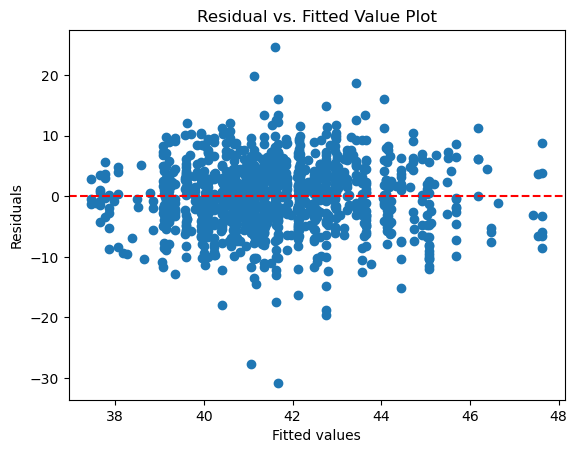

Durbin-Watson: 2.042081129601924
Breusch-Pagan test: LM Statistic = 36.61833557175281, LM-Test p-value = 0.00047537500497237776


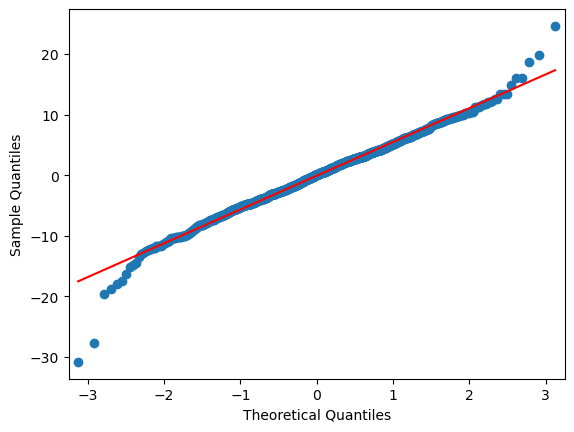

Shapiro-Wilk Test: W = 0.9879922270774841, p-value = 6.214528980308387e-08


In [109]:
residuals = y_test - y_pred_EN

# Linearity - Residual Plot
plt.scatter(y_pred_EN, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals)
print("Durbin-Watson:", dw)

# Homoscedasticity - Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X_test))
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals, line='s')
plt.show()

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

## Random Forrest

In [115]:
rf = RandomForestRegressor(n_estimators=100, random_state=123, oob_score=True)
rf.fit(X_train, y_train)

y_pred_RF = rf.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(mse_RF)
print(r2_RF)

29.274072696906618
0.16146625932662184


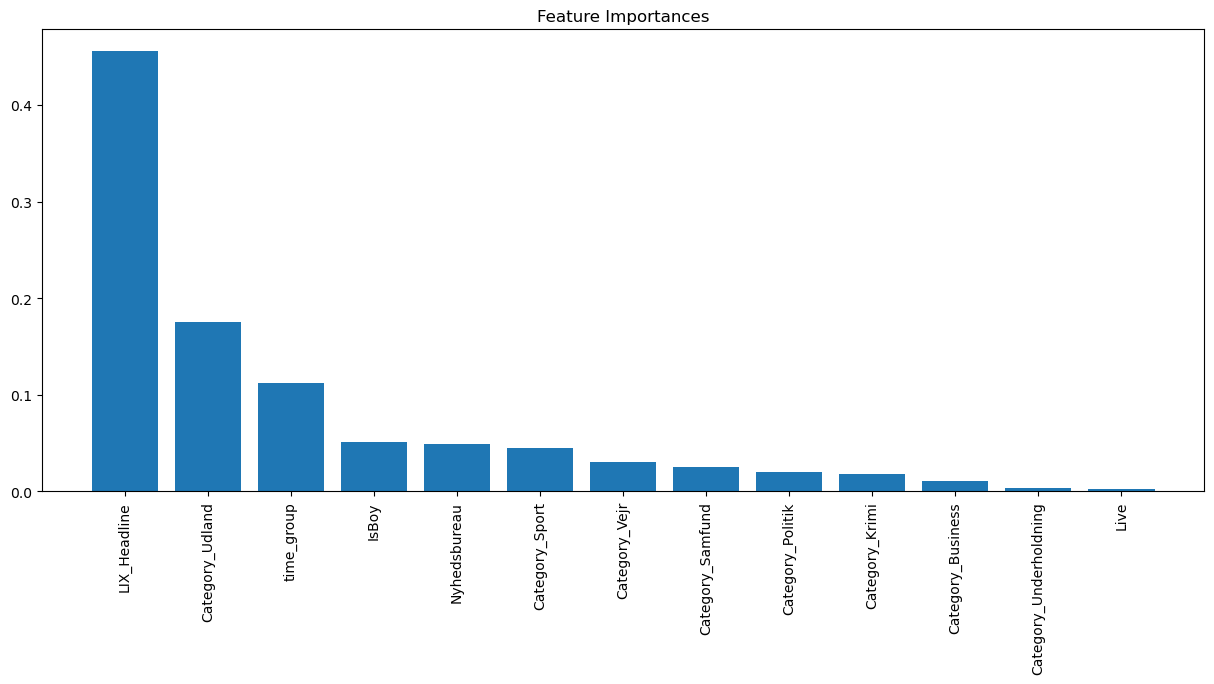

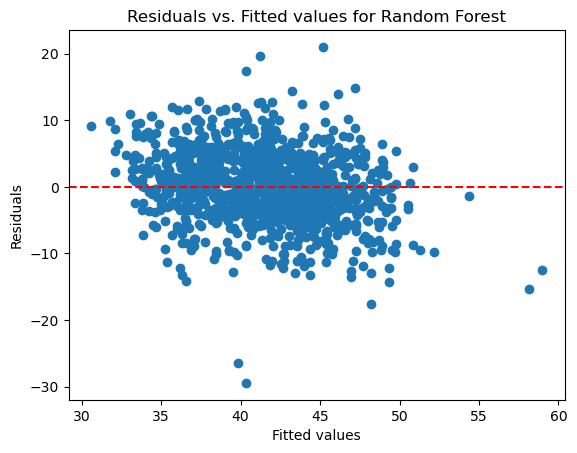

OOB Score: 0.1169545546314047


In [114]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Residuals plot
residuals_RF = y_test - y_pred_RF
plt.scatter(y_pred_RF, residuals_RF)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted values for Random Forest")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# OOB Score (Only if you set oob_score=True in the Random Forest Regressor)
if hasattr(rf, "oob_score_"):
    print("OOB Score:", rf.oob_score_)

## OLS

In [102]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

# Print out the statistics
print(model.summary())

y_pred_OLS = model.predict(X_test_const)

mae = mean_absolute_error(y_test, y_pred_OLS)
mse = mean_squared_error(y_test, y_pred_OLS)
r2 = r2_score(y_test, y_pred_OLS)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    LIX   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.03e-264
Time:                        14:50:35   Log-Likelihood:                -13680.
No. Observations:                4466   AIC:                         2.739e+04
Df Residuals:                    4452   BIC:                         2.748e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37

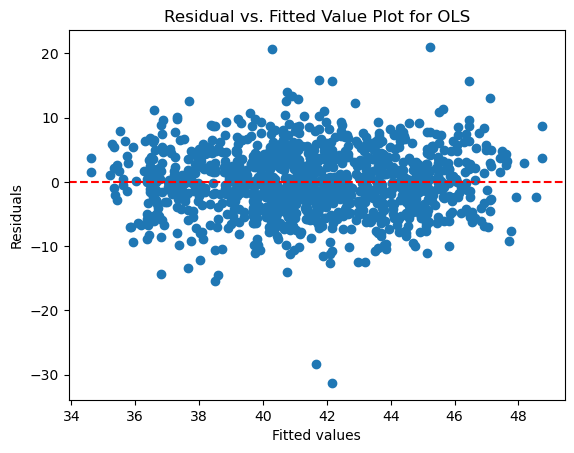

Durbin-Watson: 2.0403419750182548
Breusch-Pagan test: LM Statistic = 23.893746430088928, LM-Test p-value = 0.03212160605772688
White's test: LM Statistic = 51.483179805229014, LM-Test p-value = 0.4547334745765186
Goldfeld-Quandt test: F Statistic = 1.098019896582783, p-value = 0.13766478881366084
                              VIF
const                   59.461851
Live                     1.004883
time_group               1.048958
Nyhedsbureau             1.720154
LIX_Headline             1.057968
Category_Business        2.369714
Category_Krimi           3.963611
Category_Politik         3.711457
Category_Samfund        10.172182
Category_Sport           5.478855
Category_Udland          9.503860
Category_Underholdning   1.481679
Category_Vejr            5.290869
IsBoy                    1.786300


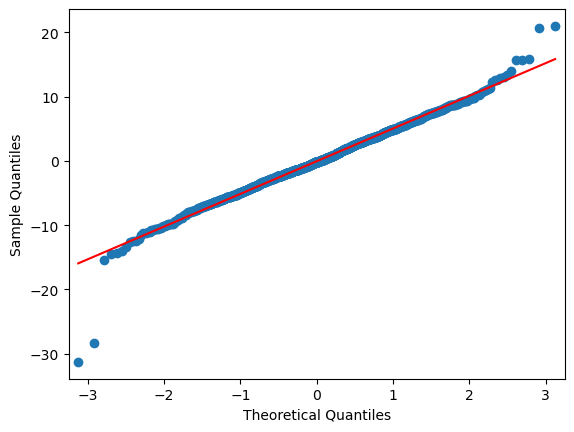

Shapiro-Wilk Test: W = 0.984107255935669, p-value = 1.0863534516403206e-09


In [111]:
residuals_OLS = y_test - y_pred_OLS

# 1. Linearity - Residual Plot
plt.scatter(y_pred_OLS, residuals_OLS)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot for OLS")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# 2. Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals_OLS)
print("Durbin-Watson:", dw)

# 3. Homoscedasticity
# Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals_OLS, X_test_const)
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# White's test
white_test = sms.diagnostic.het_white(residuals_OLS, X_test_const)
print(f"White's test: LM Statistic = {white_test[0]}, LM-Test p-value = {white_test[1]}")

# Goldfeld-Quandt
gq_test = sms.diagnostic.het_goldfeldquandt(y_test, X_test_const)
print(f"Goldfeld-Quandt test: F Statistic = {gq_test[0]}, p-value = {gq_test[1]}")

# 4. Multicollinearity - VIF
vif_data = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif = pd.DataFrame({'VIF': vif_data}, index=X_train_const.columns)
print(vif)

# 5. Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals_OLS, line='s')
plt.show()

shapiro_test = shapiro(residuals_OLS)
print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")